In [131]:
import matplotlib
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from sklearn.model_selection import train_test_split
import seaborn as sns

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)    
matplotlib.rcParams['axes.unicode_minus'] = False      
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_columns', 150)

from xgboost import XGBRegressor

random_seed = 616

# 데이터 불러오기

In [132]:
data = pd.read_excel('data/01_제공데이터/2021 빅콘테스트_데이터분석분야_퓨처스리그_홍수ZERO_댐유입량,강우,수위데이터_210803.xlsx', header=[0,1])
data.columns = ['_'.join(col).strip() if "Unnamed" not in col[1] else col[0] for col in data.columns.values]

# 1. 첫 값만 사용해서 예측

In [155]:
first_data = data.groupby('홍수사상번호').first().reset_index()

In [156]:
first_data.head()

,홍수사상번호,연,월,일,시간,유입량,데이터집단 1_유역평균강수,데이터집단 1_강우(A지역),데이터집단 1_강우(B지역),데이터집단 1_강우(C지역),데이터집단 1_강우(D지역),데이터집단 1_수위(E지역),데이터집단 1_수위(D지역),데이터집단 2_유역평균강수,데이터집단 2_강우(A지역),데이터집단 2_강우(B지역),데이터집단 2_강우(C지역),데이터집단 2_강우(D지역),데이터집단 2_수위(E지역),데이터집단 2_수위(D지역),데이터집단 3_유역평균강수,데이터집단 3_강우(A지역),데이터집단 3_강우(B지역),데이터집단 3_강우(C지역),데이터집단 3_강우(D지역),데이터집단 3_수위(E지역),데이터집단 3_수위(D지역),데이터 집단 4_유역평균강수,데이터 집단 4_강우(A지역),데이터 집단 4_강우(B지역),데이터 집단 4_강우(C지역),데이터 집단 4_강우(D지역),데이터 집단 4_수위(E지역),데이터 집단 4_수위(D지역),데이터 집단 5_유역평균강수,데이터 집단 5_강우(A지역),데이터 집단 5_강우(B지역),데이터 집단 5_강우(C지역),데이터 집단 5_강우(D지역),데이터 집단 5_수위(E지역),데이터 집단 5_수위(D지역),데이터 집단 6_유역평균강수,데이터 집단 6_강우(A지역),데이터 집단 6_강우(B지역),데이터 집단 6_강우(C지역),데이터 집단 6_강우(D지역),데이터 집단 6_수위(E지역),데이터 집단 6_수위(D지역)
0,1,2006,7,10,8,189.10,6.40,7,7,7,8,2.54,122.57,6.30,7,7,7,8,2.54,122.54,6.30,7,7,7,8,2.54,122.55,6.40,7,7,8,8,2.54,122.67,6.40,7,7,8,8,2.54,122.66,6.40,7,7,8,8,2.54,122.61
1,2,2006,7,25,24,323.99,0.00,0,1,0,0,2.93,134.44,0.00,0,1,0,0,2.93,134.41,0.00,0,1,0,0,2.93,134.39,0.50,0,1,1,0,2.93,134.52,0.50,0,1,1,0,2.93,134.50,0.50,0,1,1,0,2.93,134.47
2,3,2007,8,3,17,221.05,11.40,6,6,0,1,2.64,129.36,11.40,6,6,0,1,2.64,129.38,11.40,6,6,0,1,2.64,129.38,12.10,6,6,12,1,2.64,129.34,12.10,6,6,12,1,2.64,129.33,11.90,6,6,1,0,2.64,129.34
3,4,2007,9,14,15,161.80,0.00,0,0,0,0,2.53,140.34,0.00,0,0,0,0,2.53,140.30,0.00,0,0,0,0,2.53,140.28,0.60,0,0,1,3,2.53,140.44,0.60,0,0,1,3,2.53,140.41,0.60,0,0,1,3,2.53,140.38
4,5,2008,7,23,21,251.51,1.83,0,0,1,0,2.46,121.50,1.73,0,0,1,0,2.46,121.50,1.73,0,0,1,0,2.46,121.50,1.74,0,0,3,0,2.46,121.50,1.63,0,0,3,0,2.46,121.50,1.63,0,0,2,0,2.46,121.50


In [157]:
test_data_first = first_data[first_data.isnull().any(axis=1)]
data_first = first_data[first_data.notnull().all(axis=1)]

## 홍수사상번호 split

In [158]:
y_col = '유입량'
PK_col = ['홍수사상번호','연','월','일','시간']

In [159]:
hongsu_idx = list(data['홍수사상번호'].unique())
random.seed(random_seed)
valid_hongsu_idx = random.sample(hongsu_idx, k= int(len(hongsu_idx)*0.3))

In [160]:
train_idx = data_first[~data_first['홍수사상번호'].isin(valid_hongsu_idx)]
valid_idx = data_first[data_first['홍수사상번호'].isin(valid_hongsu_idx)]

y_train_idx = train_idx[y_col]
X_train_idx = train_idx.drop(columns=[y_col]+PK_col)

y_valid_idx = valid_idx[y_col]
X_valid_idx = valid_idx.drop(columns=[y_col]+PK_col)

print(f"train shape : {X_train_idx.shape} valid shape : {X_valid_idx.shape}")

train shape : (18, 42) valid shape : (7, 42)


## 예측

In [161]:
xgb = XGBRegressor()
xgb.fit(X_train_idx, y_train_idx)

pred_valid_idx = xgb.predict(X_valid_idx)

valid_predict_idx_first = pd.DataFrame(columns=['true', 'pred'])
valid_predict_idx_first['true'] = y_valid_idx.values
valid_predict_idx_first['pred'] = pred_valid_idx
valid_predict_idx_first['error'] = abs(valid_predict_idx_first['true'] - valid_predict_idx_first['pred'])
valid_predict_idx_first['error_percent'] = valid_predict_idx_first['error'] / valid_predict_idx_first['true'] * 100

In [162]:
valid_predict_idx

,true,pred,error,error_percent
0,189.10,116.68,72.42,38.30
1,127.12,82.06,45.06,35.45
2,407.97,661.48,253.51,62.14
3,480.26,679.39,199.13,41.46
4,236.90,212.80,24.10,10.17
5,65.80,49.93,15.87,24.12
6,643.43,760.67,117.24,18.22


In [163]:
valid_idx['홍수사상번호'].values

array([ 1,  6, 11, 15, 17, 18, 23], dtype=int64)

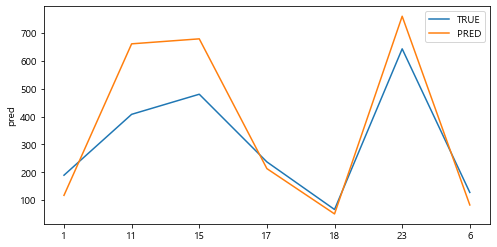

In [164]:
plt.figure(figsize=(8,4))
sns.lineplot(x=valid_idx['홍수사상번호'].astype('str').values, y=valid_predict_idx['true'], label='TRUE')
sns.lineplot(x=valid_idx['홍수사상번호'].astype('str').values, y=valid_predict_idx['pred'], label='PRED')
plt.show()

# 2. 모든 값 사용해서 예측

In [165]:
test_data = data[data.isnull().any(axis=1)]
data = data[data.notnull().all(axis=1)]

## 홍수사상번호 split

In [166]:
y_col = '유입량'
PK_col = ['홍수사상번호','연','월','일','시간']

In [167]:
hongsu_idx = list(data['홍수사상번호'].unique())
random.seed(random_seed)
valid_hongsu_idx = random.sample(hongsu_idx, k= int(len(hongsu_idx)*0.3))

In [168]:
train_idx = data[~data['홍수사상번호'].isin(valid_hongsu_idx)]
valid_idx = first_data[first_data['홍수사상번호'].isin(valid_hongsu_idx)]

y_train_idx = train_idx[y_col]
X_train_idx = train_idx.drop(columns=[y_col]+PK_col)

y_valid_idx = valid_idx[y_col]
X_valid_idx = valid_idx.drop(columns=[y_col]+PK_col)

print(f"train shape : {X_train_idx.shape} valid shape : {X_valid_idx.shape}")

train shape : (1929, 42) valid shape : (7, 42)


## 예측

In [169]:
xgb = XGBRegressor()
xgb.fit(X_train_idx, y_train_idx)

pred_valid_idx = xgb.predict(X_valid_idx)

valid_predict_idx = pd.DataFrame(columns=['true', 'pred'])
valid_predict_idx['true'] = y_valid_idx.values
valid_predict_idx['pred'] = pred_valid_idx
valid_predict_idx['error'] = abs(valid_predict_idx['true'] - valid_predict_idx['pred'])
valid_predict_idx['error_percent'] = valid_predict_idx['error'] / valid_predict_idx['true'] * 100

In [170]:
valid_predict_idx

,true,pred,error,error_percent
0,189.10,116.68,72.42,38.30
1,127.12,82.06,45.06,35.45
2,407.97,661.48,253.51,62.14
3,480.26,679.39,199.13,41.46
4,236.90,212.80,24.10,10.17
5,65.80,49.93,15.87,24.12
6,643.43,760.67,117.24,18.22


In [171]:
valid_idx['홍수사상번호'].values

array([ 1,  6, 11, 15, 17, 18, 23], dtype=int64)

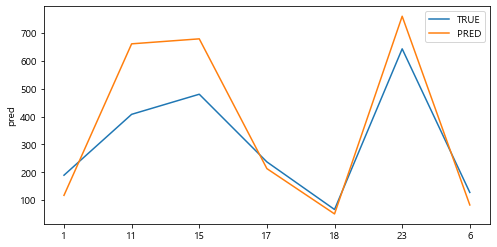

In [172]:
plt.figure(figsize=(8,4))
sns.lineplot(x=valid_idx['홍수사상번호'].astype('str').values, y=valid_predict_idx['true'], label='TRUE')
sns.lineplot(x=valid_idx['홍수사상번호'].astype('str').values, y=valid_predict_idx['pred'], label='PRED')
plt.show()

# 비교

In [175]:
valid_predict_idx['error_percent_first'] = valid_predict_idx_first['error_percent']

In [176]:
valid_predict_idx

,true,pred,error,error_percent,error_percent_first
0,189.10,116.68,72.42,38.30,26.61
1,127.12,82.06,45.06,35.45,35.38
2,407.97,661.48,253.51,62.14,28.80
3,480.26,679.39,199.13,41.46,4.78
4,236.90,212.80,24.10,10.17,17.61
5,65.80,49.93,15.87,24.12,24.51
6,643.43,760.67,117.24,18.22,29.16
